# Data Wrangling and Analysis via Twitter

**Objective:** Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

Accomplish the following: 
- Gather data from 3 different sources and formats.
- Identify and clean 8 quality (content) issues.
- Identify and clean 2 tidiness (structure) issues.
- Analyze data by producing 3 insights and 1 visualization.

## Table of Contents 
- [Introduction](#intro)
- [Gather](#gather)
- [Assess](#assess)
- [Clean](#clean)
- [Analyze](#analyze)

<a id='intro'></a>
## Introduction

**Dogtionary:** There are various stages of dog, which will be part of the observed data: doggo, pupper, puppo, and floof(er).

**Data Information:** 

_Twitter Archive_

The WeRateDogs Twitter archive is a file called `twitter-archive-enhanced.csv` that contains basic tweet data for all 5000+ of their tweets. The Twitter archive data has been filtered for tweets with ratings only, bringing the total record count to 2356.
    
_Twitter API_

Additional data can be gathered by anyone using the Twitter API. This queried data is stored in a file called `tweet_json.txt`. This shows data on retweet count and favorite count.

_Image Predictions_ 

Using a neural network, images classified dogs by breed. This is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [3]:
# import all libraries

# Requests + file path
import requests
import os

# Twitter API
import tweepy

# Data analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='gather'></a>
## Gather

### Twitter Archive

Load the Twitter Archive from a flat .csv file.

In [4]:
# load the dataset Twitter Archive from a flat file
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

twitter_archive_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Tweets via Twitter API
Use Twitter's API to get each tweet's JSON data and store in `tweet_json.txt`. Each tweet's JSON data should be written to its own line. 

Twitter API uses OAuth 1a (application-user) authentication, which is handled by the tweepy.OAuthHandler class. In order to access Twitter's API, create a developer account on https://developer.twitter.com and register our client application to obtain a key and secret. Querying for all tweets will take 20-30 minutes.

With `tweet_json.txt`, select the important fields and convert the data into a pandas dataframe.

In [56]:
# Fill in secret keys and tokens
consumer_key =
consumer_secret =
access_token = 
access_token_secret =

In [264]:
# OAuth process, using the keys and tokens
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [203]:
# Creation of the actual interface, using authentication
# To limit traffic on the server, Twitter set a rate limit to 15 minutes
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify = True)

In [259]:
# Get list of Tweet IDs from Twitter archive
tweet_ids = twitter_archive_df['tweet_id']

# Create empty list to store dictionaries
tweets = []

# Create empty list to store Tweet IDs that failed to query (some might have been deleted)
failed = []

for t_id in tweet_ids:
    try:
        tweet = api.get_status(t_id)
        # Append to list of dictionaries
        tweets.append(tweet)
    except:
        failed.append(t_id)

In [263]:
print('Failed to query:')
for i in failed:
    print(i)

Failed to query:
888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
770743923962707968
754011816964026368
680055455951884288


In [234]:
# Write JSON format of each tweet in file, with each tweet in its own line
with open("tweet_json.txt", mode="w") as file:
    for t in tweets:
        # json.dumps converts dictionary object into string (with double quotes)
        file.write(json.dumps(t))
        file.write('\n')

In [235]:
df_list = []
# Read JSON file as dataframe
with open('tweet_json.txt') as file:
    for t in file:
        # json.loads converts string (with double quotes) to dictionary object
        tweet_status = json.loads(t)
        df_list.append({
            'id': int(tweet_status['id']),
            'created_at': tweet_status['created_at'],
            'favorite_count': int(tweet_status['favorite_count']),
            'retweet_count': int(tweet_status['retweet_count'])
        })

In [239]:
tweets_df = pd.DataFrame(df_list, columns=['id','created_at','favorite_count','retweet_count'])
print(tweets_df.shape)
tweets_df.head(1)

(2333, 4)


,id,created_at,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,37164,7950


### Image Predictions
Programatically download and read the image predictions hosted on Udacity's servers. They will be stored in `image-predictions.tsv`.

In [240]:
# Use requests library to obtain file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [ ]:
# Write the url content in .tsv file
with open("image-preds.tsv", mode='wb') as file:
    file.write(response.content)


In [290]:
# Read .tsv file
image_preds_df = pd.read_csv('image-preds.tsv', sep="\t")

print(image_preds_df.shape)
image_preds_df.head(1)

(2075, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


As practice, download the images in a `image-preds` folder using the `jpg_url` in the dataframe.

**Note:** There are over 2000 images and downloading takes at least 10 minutes. Run at your own risk! :)

In [245]:
folder_name = 'image-preds'

# Create folder
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
# Download images
for url in image_preds.jpg_url:
    response = requests.get(url)
    with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as picture:
        picture.write(response.content)

<a id='assess'></a>
## Assess

Investigate each dataset to identify what needs to be cleaned.

### Twitter Archive

In [253]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [254]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [280]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [458]:
twitter_archive_df.name.value_counts()

None           745
a               55
Charlie         12
Lucy            11
Oliver          11
Cooper          11
Lola            10
Penny           10
Tucker          10
Winston          9
Bo               9
the              8
Sadie            8
Bailey           7
an               7
Daisy            7
Buddy            7
Toby             7
Scout            6
Milo             6
Koda             6
Leo              6
Bella            6
Oscar            6
Rusty            6
Jack             6
Jax              6
Stanley          6
Dave             6
Alfie            5
              ... 
Hector           1
Grizz            1
Beckham          1
Dylan            1
Fillup           1
Cupid            1
Jaycob           1
Kota             1
Striker          1
Superpup         1
Pawnd            1
Traviss          1
Amélie           1
Sprinkles        1
Bodie            1
Sage             1
Jeffri           1
Eevee            1
Grizzie          1
Shakespeare      1
Mack             1
Godi        

`twitter_archive_df` has 2356 records and 17 columns.

**Quality issues:**
* `timestamp` does not need the "+0000" extension and should be converted from type `object` to `datetime`.
* `rating_denominator` should all be 10 but there are some incorrect records (incorrect MAX value is 170). This leads to redoing the `rating_numerator` as well as some numbers look too high.
* There are 59 missing `expanded_urls`.
* `name` is listed incorrectly as "None" (should be null) or "a"/"the" (first letter should be upper case or value should be null).
* `source` can leave out the HTML tag.
* `in_reply_to_user_id`, `in_reply_to_status_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` indicate a retweet, which I will not be using for this analysis. Records with these fields as non-null are retweets and will be dropped.


**Tidiness issues:**
* `doggo`, `floofer`, `pupper`, and `puppo` are 4 separate columns but can be combined into 1 `dog_stage` column.

### Tweets from Twitter API

In [247]:
tweets_df.head()

,id,created_at,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,37164,7950
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,31970,5905
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,24077,3904
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,40486,8097
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,38711,8787


In [248]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 4 columns):
id                2333 non-null int64
created_at        2333 non-null object
favorite_count    2333 non-null int64
retweet_count     2333 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


In [249]:
tweets_df.describe()

,id,favorite_count,retweet_count
count,2.333000e+03,2333.000000,2333.000000
mean,7.419279e+17,7749.004715,2795.993571
std,6.820607e+16,12028.652571,4732.438188
min,6.660209e+17,0.000000,1.000000
25%,6.782786e+17,1347.000000,561.000000
50%,7.184547e+17,3376.000000,1305.000000
75%,7.986654e+17,9510.000000,3255.000000
max,8.924206e+17,160624.000000,80354.000000


`tweets_df` has 2333 records and 4 columns. Overall, I think this dataset is fine and data cleaning would be minimal compared with the `twitter_archive_df` dataset. 

**Quality issues:**
* `created_at` could be converted to `datetime` type, but since `twitter_archive_df` already contains `timestamp` I will ignore this column.

**Tidiness issues:**
* Append this to the `twitter_archive_df` dataframe.

### Image Predictions

In [291]:
image_preds_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [292]:
image_preds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [293]:
image_preds_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


`image_preds_df` has 2075 records and 12 columns.

**Quality issues:**
* Dogs names in `p1`, `p2`, and `p3` have inconsistent cases. They should all be lowercase. 
* Some tweets are missing from `twitter_archive_df`. Drop records that lack images.

**Tidiness issues:**
* Although the structure seems logical, some predictions are not dogs. I will make a separate column giving the best **dog** prediction.
* Append this to the `twitter_archive_df` dataframe.

### Conclusion for Assessing Data

**Identified quality issues:**

*twitter_archive_df*
* Drop records that are retweets, which mean if `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` are not null.
* `timestamp` does not need the "+0000" extension and should be converted from type `object` to `datetime`.
* `rating_numerator` looks suspicious (need to cast as float instead of int).
* `rating_denominator` should all be 10 but there are some incorrect records (incorrect MAX value is 170).
* `name` is listed incorrectly as "None" (should be null) or "a"/"the" (first letter should be upper case or value should be null).
* `source` can leave out the HTML tag.

*image_preds_df*
* Dogs names in `p1`, `p2`, and `p3` in `image_preds_df` have inconsistent cases. They should all be lowercase. 
* Drop unneccessary columns.
    
**Identified tidiness issues:**
* Combine `doggo`, `floofer`, `pupper`, and `puppo` in `twitter_archive_df` from 4 columns into 1 `dog_stage` column.
* Combine all 3 dataframes into 1 dataframe with a unique identifier as `tweet_id`.
* Drop records that lack images.

<a id="clean"></a>
## Clean

In [298]:
# Create copies of the original 3 datasets for reference
twitter_archive_clean_df = twitter_archive_df.copy()
image_preds_clean_df = image_preds_df.copy()
tweets_clean_df = tweets_df.copy() 

# Save these clean copies as .csv
twitter_archive_clean_df.to_csv('twitter_archive_clean_df.csv',encoding='utf-8',index=False)
image_preds_clean_df.to_csv('image_preds_clean_df.csv',encoding='utf-8',index=False)
tweets_clean_df.to_csv('tweets_clean_df.csv',encoding='utf-8',index=False)

In [18]:
# Load clean files (as a checkpoint)
twitter_archive_clean_df = pd.read_csv('twitter_archive_clean_df.csv')
image_preds_clean_df = pd.read_csv('image_preds_clean_df.csv')
tweets_clean_df = pd.read_csv('tweets_clean_df.csv')

**Quality 1:** Drop records that are retweets, which mean if `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` are not null.

In [19]:
print("There are {} retweets.".format(twitter_archive_clean_df[~twitter_archive_clean_df.retweeted_status_id.isnull()].shape[0]))

There are 181 retweets.


In [20]:
twitter_archive_clean_df = twitter_archive_clean_df[twitter_archive_clean_df.retweeted_status_id.isnull()]

In [21]:
# Test if retweets still exist
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [22]:
# Drop unnecessary columns
col = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_archive_clean_df.drop(columns = col, inplace=True)

In [23]:
# Test column drop was successful
twitter_archive_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

**Quality 2:** Convert `timestamp` in `twitter_archive_clean_df` to datetime type. Create a `date` and `time` column.

In [24]:
# import libary to format datetime
from datetime import datetime

In [25]:
# Convert from string to datetime
twitter_archive_clean_df.timestamp = pd.to_datetime(twitter_archive_clean_df.timestamp)

# Create date and time columns
twitter_archive_clean_df['date'] = twitter_archive_clean_df.timestamp.apply(lambda x:datetime.strftime(x,'%Y-%m-%d'))
twitter_archive_clean_df['time'] = twitter_archive_clean_df.timestamp.apply(lambda x:datetime.strftime(x,'%H:%M:%S'))

In [26]:
# Test if converting timestamp type and creating columns were successful
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
date                  2175 non-null object
time                  2175 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(10)
memory usage: 254.9+ KB


In [27]:
# Check if creating date and time fields were successful
twitter_archive_clean_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24


**Quality 3:** Create `numerator` that would fix values in `rating_numerator` in `twitter_archive_clean_df` by parsing the rating from `text` and parsing the numerator.

In [28]:
twitter_archive_clean_df[['numerator','denominator']] = twitter_archive_clean_df.text.str.extract(r'(\d+\.*\d*)/(\d+\.*\d*)')

In [29]:
# Check that numerator is correct
twitter_archive_clean_df.numerator.value_counts()

12       500
10       442
11       426
13       307
9        156
8         98
7         53
14        43
5         34
6         32
3         19
4         17
2          9
1          8
420        2
0          2
9.5        1
144        1
11.26      1
9.75       1
11.27      1
88         1
165        1
960        1
80         1
24         1
182        1
50         1
121        1
60         1
45         1
15         1
84         1
666        1
17         1
44         1
204        1
20         1
007        1
99         1
13.5       1
1776       1
143        1
Name: numerator, dtype: int64

In [30]:
# There are some numerator floats. Verify that it's correct from the text.
print(twitter_archive_clean_df.query('numerator == "9.75"').iloc[0].text)
twitter_archive_clean_df.query('numerator == "9.75"').iloc[0][['rating_numerator','numerator']]

This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS


rating_numerator      75
numerator           9.75
Name: 695, dtype: object

**Quality 4:** Fix values in `rating_denominator` in `twitter_archive_clean_df`. Check if they should all be 10.

In [31]:
# Check the values from the parsed denominator
twitter_archive_clean_df.denominator.value_counts()

10      2134
10.       19
11         2
50         2
20         2
80         2
7          1
50.        1
15         1
130.       1
120        1
90         1
70         1
110        1
00         1
16         1
170        1
150        1
40         1
2          1
Name: denominator, dtype: int64

In [32]:
# Investigate the record with 170 as denominator
print(twitter_archive_clean_df.query('denominator == "170"').iloc[0].text)
twitter_archive_clean_df.query('denominator == "170"').iloc[0].expanded_urls

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv


'https://twitter.com/dog_rates/status/731156023742988288/photo/1'

With the example above, I believe that not all tweets follow the "10 as denominator" rule. Rather than replacing all `rating_denominator`s by "10", I will normalize all ratings by multiplying the numerator by a factor that would make the denominator 10.

In [33]:
# There is one exception with the parsed rating (cannot be divided by 0)
print(twitter_archive_clean_df.query('denominator == "00"').iloc[0].text)

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


In [34]:
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
date                  2175 non-null object
time                  2175 non-null object
numerator             2175 non-null object
denominator           2175 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(12)
memory usage: 288.9+ KB


In [35]:
# Find factor that would make denominator = 0
twitter_archive_clean_df['factor'] = 10.0 / twitter_archive_clean_df['denominator'].astype('float')

In [36]:
# Multiply numerator by factor
twitter_archive_clean_df['rating_numerator'] = round(twitter_archive_clean_df['numerator'].astype('float') * twitter_archive_clean_df['factor'],2)

# Change denominator to 10
twitter_archive_clean_df['rating_denominator'] = 10

In [37]:
# Handle edge case where denominator = 0 (factor and numerator would be infinite). The rating should be 13/10
twitter_archive_clean_df['rating_numerator'].replace(np.inf,13.0, inplace=True)

In [38]:
# Check that the count for rating_numerator = 13 increased by 1 from 351 to 352
twitter_archive_clean_df['rating_numerator'].value_counts()

12.00      504
10.00      444
11.00      431
13.00      308
9.00       156
8.00        98
7.00        53
14.00       43
5.00        35
6.00        32
3.00        19
4.00        15
2.00        11
1.00         7
0.00         2
420.00       2
11.26        1
1776.00      1
13.50        1
17.00        1
9.75         1
666.00       1
12.50        1
15.00        1
11.27        1
8.18         1
34.29        1
7.33         1
9.50         1
182.00       1
6.36         1
Name: rating_numerator, dtype: int64

In [39]:
# Drop uneccessary columns
twitter_archive_clean_df.drop(columns = ['numerator', 'denominator', 'factor'], inplace=True)
# Check
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
date                  2175 non-null object
time                  2175 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(10)
memory usage: 254.9+ KB


**Quality 5:** Fix incorrect dog `name`s by changing incorrect ones to NaN. The incorrect ones have the first letter as lowercase.

In [46]:
# Check if extracting name from text is possible to avoid dropping invalid entries in name column
for i in range(0,10):
    print(i)
    print(twitter_archive_clean_df.text[i])

0
This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
5
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
6
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

https://t.co/Zr4hWfA

Names tend to start with an upper case and fall after the words "is", "Meet", and "named" in the first sentence. There are some text that don't reveal the dog's name.

In [47]:
# Extract name from text
twitter_archive_clean_df['name'] = twitter_archive_clean_df.text.str.extract('(is|Meet|named) ([A-Z][a-z]+)')[1]

# Check if successful
for i in range(0,10):
    print(twitter_archive_clean_df.name[i])

Phineas
Tilly
Archie
Darla
Franklin
nan
Jax
nan
Zoey
Cassie


**Quality 6:** `source` should leave out HTML tags.

In [48]:
# See different values for source
twitter_archive_clean_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

We can categorize this by the 4 text values: "Twitter for iPhone", "Vine - Make a Scene", "Twitter Web Client", and "TweetDeck".

In [49]:
twitter_archive_clean_df['source'] = twitter_archive_clean_df.source.apply(lambda x: x.split(">")[1].split("<")[0])

In [50]:
# Check that parsing was successful
twitter_archive_clean_df.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

**Quality 7:** Remove unimportant columns from `image_preds_clean_df`. I will create one `dog_breed` column that takes the prediction with the highest confidence if the prediction is a dog. For example, I will take `p1` if `p1_dog` = True.

In [51]:
# Create empty list for dog_breeds
breeds = []

# Get best dog prediction
def dog_breed(row):
    if row["p1_dog"] == True:
        breeds.append(row["p1"])
    elif row["p2_dog"] == True:
        breeds.append(row["p2"])
    elif row["p3_dog"] == True:
        breeds.append(row["p3"])
    else:
        breeds.append(pd.np.nan)
        
image_preds_clean_df.apply(dog_breed, axis=1)
image_preds_clean_df['dog_breed'] = pd.Series(breeds).str.lower()

In [52]:
image_preds_clean_df['dog_breed'].value_counts()

golden_retriever                  173
labrador_retriever                113
pembroke                           96
chihuahua                          95
pug                                65
toy_poodle                         52
chow                               51
samoyed                            46
pomeranian                         42
cocker_spaniel                     34
malamute                           34
french_bulldog                     32
chesapeake_bay_retriever           31
miniature_pinscher                 26
cardigan                           23
eskimo_dog                         22
staffordshire_bullterrier          22
beagle                             21
german_shepherd                    21
shih-tzu                           20
siberian_husky                     20
lakeland_terrier                   19
shetland_sheepdog                  19
kuvasz                             19
rottweiler                         19
maltese_dog                        19
italian_grey

**Quality 8:** Drop unnecessary columns from `image_preds_clean_df`.

In [53]:
# Drop unnecessary columns
col = ['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']
image_preds_clean_df.drop(columns = col, inplace=True)

# Check if successful
image_preds_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id     2075 non-null int64
jpg_url      2075 non-null object
dog_breed    1751 non-null object
dtypes: int64(1), object(2)
memory usage: 48.7+ KB


**Tidiness 1:** Combine `doggo`, `floofer`, `pupper`, and `puppo` in `twitter_archive_df` from 4 columns into 1 `dog_stage` column.

In [54]:
# Replace None with NaN
twitter_archive_clean_df[['doggo','floofer','pupper','puppo']] = twitter_archive_clean_df[['doggo','floofer','pupper','puppo']].replace("None",pd.np.nan)

In [55]:
# Unpivot dog stage columns into the dataframe dog_stages
dog_stages = pd.melt(twitter_archive_clean_df, id_vars='tweet_id', value_vars=['doggo','floofer','pupper','puppo'], value_name='dog_stage')

# Remove unwanted column
dog_stages.drop(columns=["variable"], inplace=True)

# Remove rows where there is no dog_stage
dog_stages = dog_stages[dog_stages.dog_stage.isnull()==False]

In [56]:
# Check that each tweet has a unique (or null) stage
dog_stages.tweet_id.value_counts()

817777686764523521    2
759793422261743616    2
751583847268179968    2
802265048156610565    2
855851453814013952    2
741067306818797568    2
785639753186217984    2
733109485275860992    2
854010172552949760    2
781308096455073793    2
801115127852503040    2
808106460588765185    2
673148804208660480    1
684588130326986752    1
682406705142087680    1
678800283649069056    1
886366144734445568    1
825026590719483904    1
884162670584377345    1
702598099714314240    1
748337862848962560    1
686618349602762752    1
706310011488698368    1
786363235746385920    1
693590843962331137    1
675740360753160193    1
821107785811234820    1
703407252292673536    1
757393109802180609    1
684830982659280897    1
                     ..
696877980375769088    1
685667379192414208    1
674318007229923329    1
677269281705472000    1
808733504066486276    1
836753516572119041    1
703611486317502464    1
813127251579564032    1
796484825502875648    1
703268521220972544    1
7780390878360698

In [57]:
# There are actually some tweets with multiple dog stages
# Dog_stage column will only be left joined when doing an analysis on dog_stage to avoid double counting
twitter_archive_clean_df[twitter_archive_clean_df.tweet_id == 733109485275860992]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
1113,733109485275860992,2016-05-19 01:38:16+00:00,Twitter for iPhone,"Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12.0,10,NaN,doggo,NaN,pupper,NaN,2016-05-19,01:38:16


In [58]:
# Drop unwanted columns
col = ["doggo","floofer","pupper","puppo"]
twitter_archive_clean_df.drop(columns = col, inplace = True)

In [59]:
# Merge dog_stages to twitter_archive_clean_df in a new dataframe
twitter_archive_clean_df_doggo = twitter_archive_clean_df.merge(dog_stages, how="left", on="tweet_id")

In [60]:
# Check if successful
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null int64
name                  1347 non-null object
date                  2175 non-null object
time                  2175 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(6)
memory usage: 266.9+ KB


In [61]:
# Check if successful
twitter_archive_clean_df_doggo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2186
Data columns (total 11 columns):
tweet_id              2187 non-null int64
timestamp             2187 non-null datetime64[ns, UTC]
source                2187 non-null object
text                  2187 non-null object
expanded_urls         2129 non-null object
rating_numerator      2187 non-null float64
rating_denominator    2187 non-null int64
name                  1351 non-null object
date                  2187 non-null object
time                  2187 non-null object
dog_stage             356 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(7)
memory usage: 205.0+ KB


**Tidiness 2:** Combine all 3 dataframes into 1.

In [62]:
# Use inner join because we want to analyze tweets that have been classified by dog breeds
df = twitter_archive_clean_df.merge(image_preds_clean_df, how="inner", on="tweet_id")
df = df.merge(tweets_clean_df, how="right", left_on ="tweet_id", right_on="id")
df.drop(columns=['created_at','id'], inplace=True)

# Check if successful
df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,jpg_url,dog_breed,favorite_count,retweet_count
0,8.924206e+17,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,2017-08-01,16:23:56,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,37164,7950


In [63]:
# Do the same merging for the dataset with dog stages
df_doggo = twitter_archive_clean_df_doggo.merge(image_preds_clean_df, how="inner", on="tweet_id")
df_doggo = df_doggo.merge(tweets_clean_df, how="right", left_on ="tweet_id", right_on="id")
df_doggo.drop(columns=['created_at','id'], inplace=True)

# Check if successful
df_doggo.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage,jpg_url,dog_breed,favorite_count,retweet_count
0,8.924206e+17,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,2017-08-01,16:23:56,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,37164,7950


After cleaning the dataset, save these new tables as .csv files.

In [64]:
df.to_csv("weratedogs_clean.csv", index=False)
df_doggo.to_csv("weratedogs_clean_dogstages.csv", index=False)

In [65]:
# Save final dataset 
df.to_csv("twitter_archive_master.csv", index=False)

<a id='analyze'></a>
## Analyze

My insights for this dataset will be regarding these 2 questions:
1. What is the average rating and popularity by dog breed? 
2. What is the average rating and popularity by dog stage?

### Insights for dog breeds

In [66]:
avg_rating_breed = pd.DataFrame(df.groupby('dog_breed').mean().rating_numerator).sort_values('rating_numerator')
avg_rating_breed.describe()

,rating_numerator
count,113.000000
mean,10.611088
std,0.956336
min,5.000000
25%,10.000000
50%,10.650000
75%,11.166667
max,13.000000


In [67]:
# Which dog has the highest average rating?
avg_rating_breed[avg_rating_breed.rating_numerator == avg_rating_breed.rating_numerator.max()]

,rating_numerator
dog_breed,
bouvier_des_flandres,13.0


In [68]:
# Which dog has the lowest average rating?
avg_rating_breed[avg_rating_breed.rating_numerator == avg_rating_breed.rating_numerator.min()]

,rating_numerator
dog_breed,
japanese_spaniel,5.0


Out of the 113 breeds identified, the average rating out of 10 is 10.6. The highest average is 13.0 which belongs to the bouvier des flandres (I had to Google this breed). The lowest average is 5.0 which belongs to the Japanese spaniel.

Since there are a lot of breeds with many rare or uncommon ones, I will filter the dataset for less dog breeds using a tweet count threshold.

In [69]:
# Count the number of tweets for each dog breed
count_rating_breed = pd.DataFrame(df.groupby('dog_breed').count().tweet_id).sort_values('tweet_id')
count_rating_breed.describe()

,tweet_id
count,113.000000
mean,14.858407
std,22.295046
min,1.000000
25%,4.000000
50%,8.000000
75%,16.000000
max,158.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cc21ba8>]],
      dtype=object)

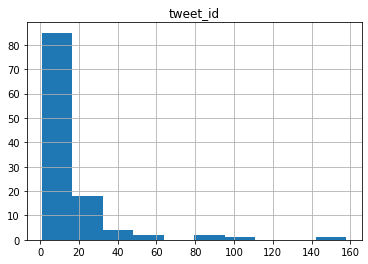

In [70]:
# Plot distribution
count_rating_breed.hist()

Out of the 113 breeds, the average count of tweets is 14.9. The distribution of tweet counts by dog breeds is heavily skewed right, with 25% of the breeds (28 breeds) having 4 or less tweets. If I eliminate dog breeds that have under 16 tweets, I will only get the top quartile with ~28 more common breeds to observe.

In [71]:
# Get list of dog breeds with 16 or more tweets
dog_breeds = pd.DataFrame(count_rating_breed[count_rating_breed.tweet_id >= 16].reset_index().dog_breed)

# Filter dataframe
df_filtered_breeds = df.merge(dog_breeds, how="inner", on="dog_breed")

# Get distribution of ratings for these popular dog breeds
pd.DataFrame(df_filtered_breeds.groupby('dog_breed').mean().rating_numerator).sort_values('rating_numerator').describe()

,rating_numerator
count,29.000000
mean,10.813517
std,0.549019
min,9.526316
25%,10.444444
50%,10.878788
75%,11.166667
max,11.731707


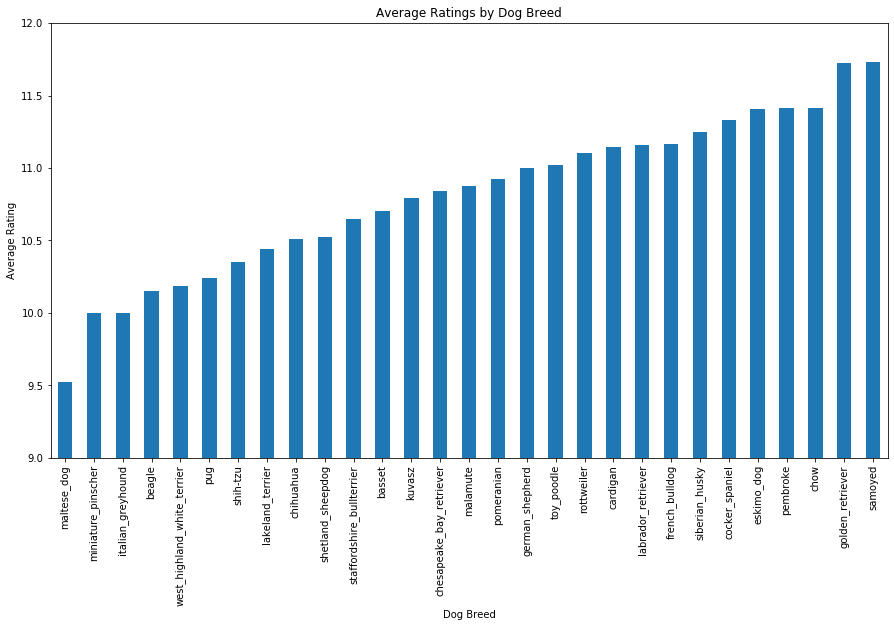

In [72]:
# Plot ratings
fig = plt.figure(figsize=(15,8))
df_filtered_breeds.groupby("dog_breed").mean().sort_values('rating_numerator').rating_numerator.plot(kind="bar")
plt.title("Average Ratings by Dog Breed")
plt.ylabel("Average Rating")
plt.xlabel("Dog Breed")
plt.ylim(9,12);

Samoyed is the dog with highest ratings among the 29 popular dog breeds with at least 16 tweets. Golder retriever is a close second. The maltese dog is less popular with an average rating below 10. 

Besides average rating, I will check if average rating has correlation with retweet count or favorite count.

Text(0.5, 1.0, 'Retweet count v. Rating of Tweets')

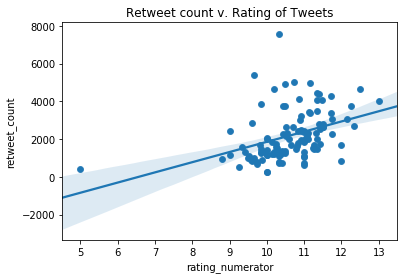

In [73]:
stats_by_breed = df.groupby('dog_breed').mean()[["rating_numerator","favorite_count","retweet_count"]]

# Plot rating by retweet count
stats_by_breed.plot(x='rating_numerator', y='retweet_count', kind='scatter')
sns.regplot(stats_by_breed['rating_numerator'], stats_by_breed['retweet_count'])
plt.title('Retweet count v. Rating of Tweets')

Text(0.5, 1.0, 'Retweet count v. Rating of Tweets')

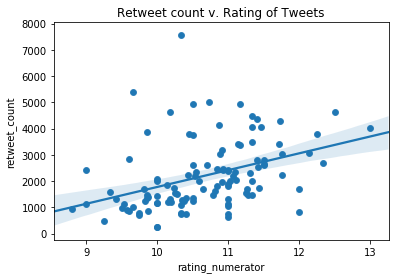

In [74]:
# Ignore the 5 rating because it's an outlier
stats_by_breed = stats_by_breed.query('rating_numerator > 5')

stats_by_breed.plot(x='rating_numerator', y='retweet_count', kind='scatter')
sns.regplot(stats_by_breed['rating_numerator'], stats_by_breed['retweet_count'])
plt.title('Retweet count v. Rating of Tweets')

The positive slope indicates there's a correlation between rating and retweet.

Text(0.5, 1.0, 'Favorite count v. Rating of Tweets')

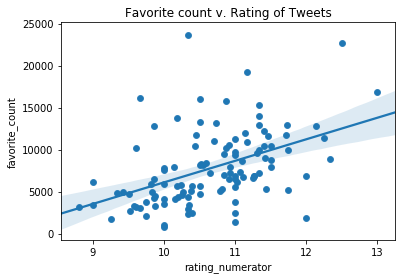

In [75]:
# Plot rating by favorite count
stats_by_breed.plot(x='rating_numerator', y='favorite_count', kind='scatter')
sns.regplot(stats_by_breed['rating_numerator'], stats_by_breed['favorite_count'])
plt.title('Favorite count v. Rating of Tweets')

There's also a positive correlation with rating and favorite count.

Text(0.5, 1.0, 'Favorite count v. Count of Tweets')

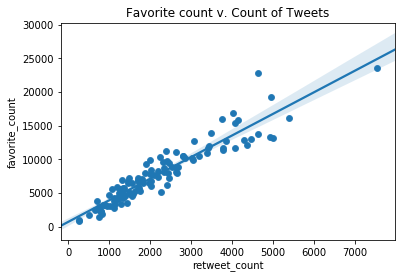

In [80]:
# Plot retweet by favorite count
stats_by_breed.plot(x='retweet_count', y='favorite_count', kind='scatter')
sns.regplot(stats_by_breed['retweet_count'], stats_by_breed['favorite_count'])
plt.title('Favorite count v. Count of Tweets')

There's a very strong correlation between favorite and retweet count. This might be expected because the more views or actions on a tweet could cause both retweets and favorites. People who tend to favorite might also share this with friends.

I can probably guess that for dog breeds, the types with higher favorite counts would also have higher retweet counts.

Text(0.5, 0, 'Dog Breed')

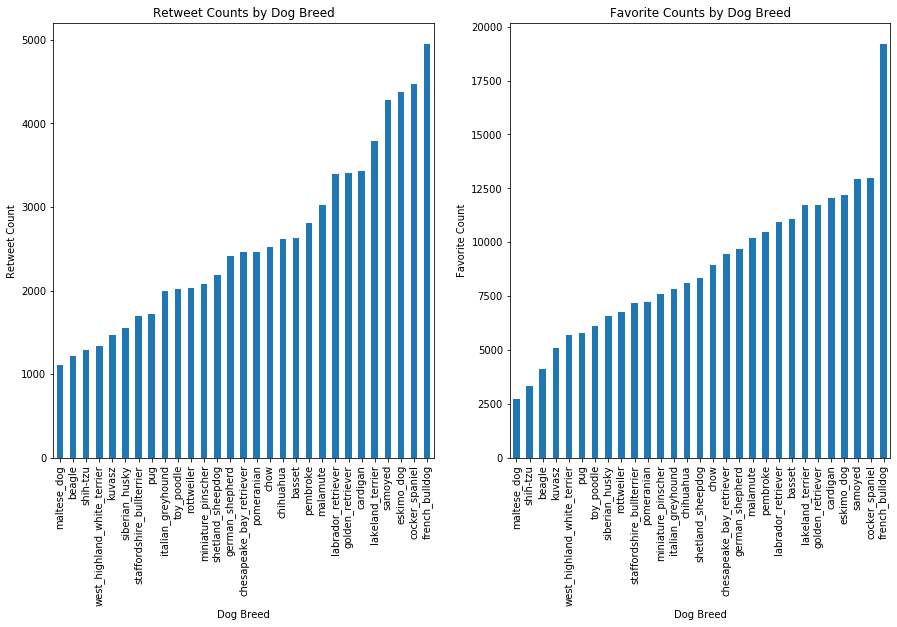

In [77]:
plt.figure(figsize=(15,8))

plt.subplot(121)
df_filtered_breeds.groupby("dog_breed").mean().sort_values('retweet_count').retweet_count.plot(kind="bar")
plt.title("Retweet Counts by Dog Breed")
plt.ylabel("Retweet Count")
plt.xlabel("Dog Breed")

plt.subplot(122)
df_filtered_breeds.groupby("dog_breed").mean().sort_values('favorite_count').favorite_count.plot(kind="bar")
plt.title("Favorite Counts by Dog Breed")
plt.ylabel("Favorite Count")
plt.xlabel("Dog Breed")

The highest retweet and favorite count belongs to the french bulldog. The maltese dog, shi tzu, and beagle are in the bottom 3 for both retweet and favorite counts.

### Insights for Dog Stage

In [78]:
# Filter out tweets with no dog stage classification
df_doggo_filtered = df_doggo[~df_doggo.dog_stage.isnull()]

df_doggo_filtered.shape[0]

316

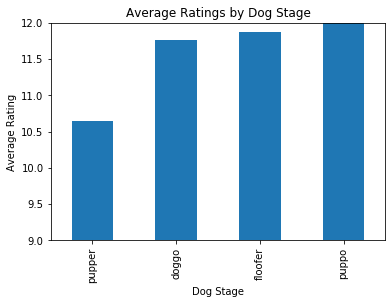

In [79]:
# Plot ratings
df_doggo_filtered.groupby("dog_stage").mean().sort_values('rating_numerator').rating_numerator.plot(kind="bar")
plt.title("Average Ratings by Dog Stage")
plt.ylabel("Average Rating")
plt.xlabel("Dog Stage")
plt.ylim(9,12);

Puppo has the highest average rating followed by floofer then doggo. Pupper has the lowest average rating.

Text(0.5, 0, 'Dog Stage')

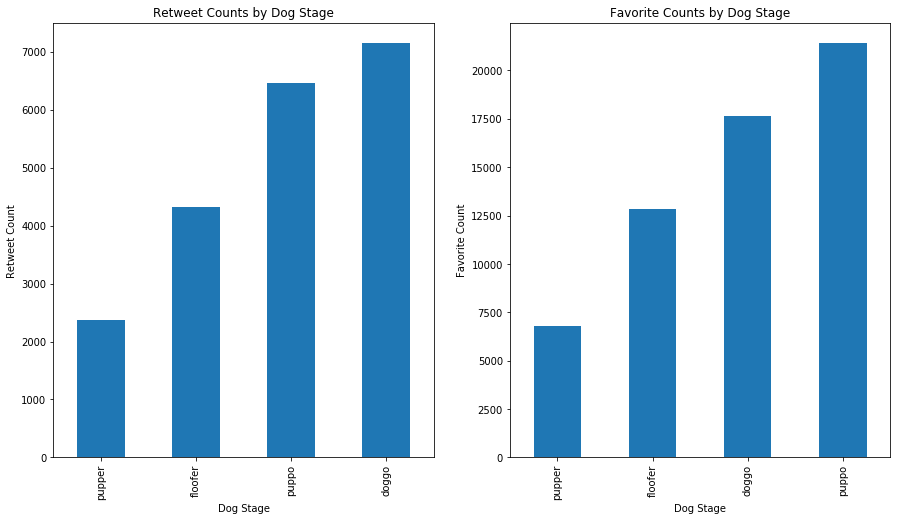

In [27]:
plt.figure(figsize=(15,8))

plt.subplot(121)
df_doggo_filtered.groupby("dog_stage").mean().sort_values('retweet_count').retweet_count.plot(kind="bar")
plt.title("Retweet Counts by Dog Stage")
plt.ylabel("Retweet Count")
plt.xlabel("Dog Stage")

plt.subplot(122)
df_doggo_filtered.groupby("dog_stage").mean().sort_values('favorite_count').favorite_count.plot(kind="bar")
plt.title("Favorite Counts by Dog Stage")
plt.ylabel("Favorite Count")
plt.xlabel("Dog Stage")

Similar to the previous analysis on average rating, pupper has the lowest retweet and favorite count. Doggo and puppo share the first 2 highest counts.